In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set_style('darkgrid')
import collections
from Metrics_help import *
import GraphLoader

### Load Graphs 

In [3]:
search_size = 10
traffic_graph = GraphLoader.load_traffic_graph()
link_graph = GraphLoader.load_page_graph()
link_graph_undirected = link_graph.to_undirected()
subgraph = GraphLoader.load_page_subgraph()


## Load Traffic data

In [15]:
df = pd.read_json('data/merged_traffic_latest.json')
df.head()


,2109-05-04 10:53:35,2109-05-04 10:53:19,2109-05-04 10:50:04,2109-05-04 10:49:03,2109-05-04 10:47:53,2109-05-04 10:45:17,2109-05-04 10:43:22,2109-05-04 10:42:34,2109-05-04 10:38:28,2109-05-04 10:47:19,...,2109-05-03 00:11:26,2109-04-29 05:44:08,2109-04-29 05:36:53,2109-04-29 05:20:25,2109-04-29 05:35:46,2109-04-29 05:23:11,2109-04-29 05:33:10,2109-04-29 05:04:03,2109-04-29 05:07:33,2109-04-29 05:24:17
_links,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,...,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....,{'details': {'href': 'https://api.siteimprove....
city,Koganei,Rotterdam,Delft,Eindhoven,Amsterdam,Zuid-Scharwoude,Delft,Delft,Arnhem,Zoetermeer,...,Haarlem,Falavarjan,Pompeu,Hardenberg,Yazd,Don Torcuato,Bolsward,Rotterdam,Rotterdam,Delft
country_code,JP,NL,NL,NL,NL,NL,NL,NL,NL,NL,...,NL,IR,BR,NL,IR,AR,NL,NL,NL,NL
country_name,Japan,Netherlands,Netherlands,Netherlands,Netherlands,Netherlands,Netherlands,Netherlands,Netherlands,Netherlands,...,Netherlands,"Iran, Islamic Republic of",Brazil,Netherlands,"Iran, Islamic Republic of",Argentina,Netherlands,Netherlands,Netherlands,Netherlands
id,4397108015,4397107999,4397107804,4397107743,4397107673,4397107517,4397107402,4397107354,4397107108,4397107639,...,4396983086,4396657448,4396657013,4396656025,4396656946,4396656191,4396656790,4396655043,4396655253,4396656257


In [4]:
df= df.T.reset_index()
df1 =  df.drop(['index','_links','region','city','last_page_view','organisation','country_name'], axis=1)


In [5]:
df1.head(5)


,country_code,id,page_views,pagelist
0,JP,4397108015,1,"[{'id': 363447662, 'title': 'Track: Urbanism',..."
1,NL,4397107999,1,"[{'id': 668110769, 'title': 'Image', 'url': 'h..."
2,NL,4397107804,1,"[{'id': 336118449, 'title': 'Home', 'url': 'ht..."
3,NL,4397107743,1,"[{'id': 363449711, 'title': 'Justus & Louise v..."
4,NL,4397107673,1,"[{'id': 363456102, 'title': 'Finance', 'url': ..."


In [6]:
x= df1['pagelist']
df2=pd.DataFrame(x[25])
df2

,has_integration,id,last_page_view,title,url
0,False,337155966,2020-04-05T21:00:06+02:00,Delft University of Technology,https://www.tudelft.nl/en/
1,False,363442495,2020-04-05T21:00:32+02:00,Programmes,https://www.tudelft.nl/en/education/programmes/
2,False,363444474,2020-04-05T21:00:46+02:00,Bachelors,https://www.tudelft.nl/en/education/programmes...
3,False,363450381,2020-04-05T21:01:07+02:00,BSc Molecular Science & Technology,https://www.tudelft.nl/en/education/programmes...
4,False,363443376,2020-04-05T21:01:15+02:00,BSc Life Science & Technology,https://www.tudelft.nl/en/education/programmes...
5,False,507506306,2020-04-05T21:01:48+02:00,TNW_BSc_LST_brochure.pdf,https://d1rkab7tlqy5f1.cloudfront.net/TUDelft/...


In [7]:
df1['page_views'].value_counts()

1     163
2      45
3      24
4      10
5       9
6       8
8       5
9       4
10      2
17      1
15      1
14      1
12      1
11      1
7       1
Name: page_views, dtype: int64

Text(0.5, 1.0, 'Common page views')

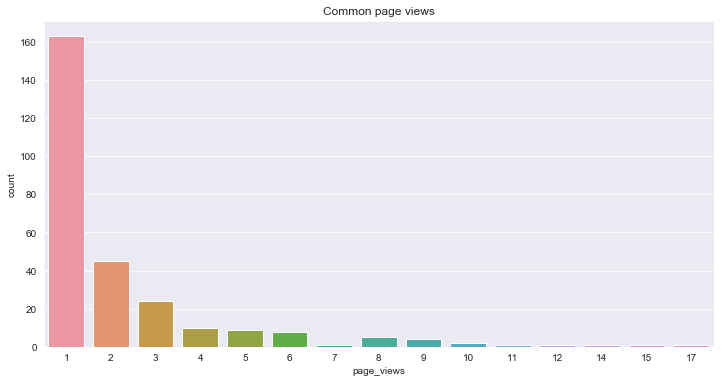

In [8]:
plt.figure(figsize =(12,6))
sns.countplot(df1['page_views'])
plt.title('Common page views')

Most people visited only 1 page

### Graph exploration

In [9]:
N = traffic_graph.number_of_nodes()
L = traffic_graph.number_of_edges()

print(nx.info(traffic_graph))

Name: 
Type: Graph
Number of nodes: 788
Number of edges: 1738
Average degree:   4.4112


In [10]:
#link density
p = nx.density(traffic_graph)
print("Link density:", p)

Link density: 0.005605041312185966


In [11]:
#average degree 
deg = traffic_graph.degree()
s=0
for item in list(deg):
    s = s+ item[1]
    
av_deg = s/N
print('The average degree is {}'.format(av_deg))

The average degree is 4.411167512690355


In [12]:
# i use pandas a lot :/
degg = pd.DataFrame()
degg['Nodes'] = dict(deg).keys()
degg['Degree'] = dict(deg).values()

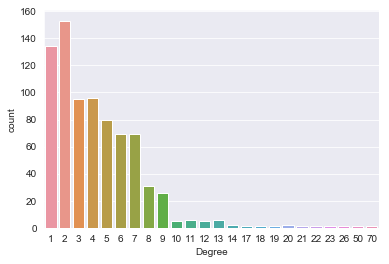

In [13]:
sns.countplot(degg['Degree'])

In [14]:
#shows the number of nodes that have the same degree

degg['Degree'].value_counts(ascending=True)

70      1
26      1
23      1
22      1
21      1
19      1
18      1
17      1
50      1
20      2
14      2
12      5
10      5
13      6
11      6
9      26
8      31
7      69
6      69
5      80
3      95
4      96
1     134
2     153
Name: Degree, dtype: int64

In [15]:
degg.sort_values('Degree',ascending= False).head(20)

,Nodes,Degree
1,https://www.tudelft.nl,70
31,https://www.tudelft.nl/en/,50
33,https://www.tudelft.nl/en/education/programmes...,26
14,https://www.tudelft.nl/2020/tu-delft/coronavirus/,23
2,https://www.tudelft.nl/onderwijs/opleidingen/,22
55,https://www.tudelft.nl/zoeken/,21
3,https://www.tudelft.nl/onderwijs/opleidingen/b...,20
32,https://www.tudelft.nl/en/education/programmes/,20
99,https://www.tudelft.nl/en/education/programmes...,19
184,https://www.tudelft.nl/studenten/,18


In [16]:
# degree variance 

x=0 
for item in list(deg):
    x += (item[1] - av_deg)**2
    
var_d = x/N

print("Degree variance:", var_d)

Degree variance: 18.292870210518366


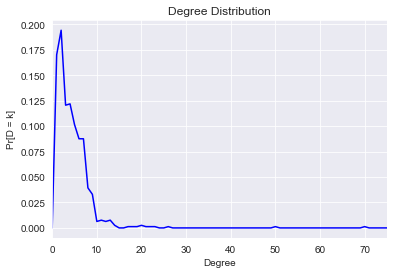

In [17]:
# or sns.distplot()
plot_degree_distribution(dict(traffic_graph.degree).values())

C:\Users\konch\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-1.1035996316056862,
 1.1058953587637466,
 -1.104044088527847,
 1.087412494057057)

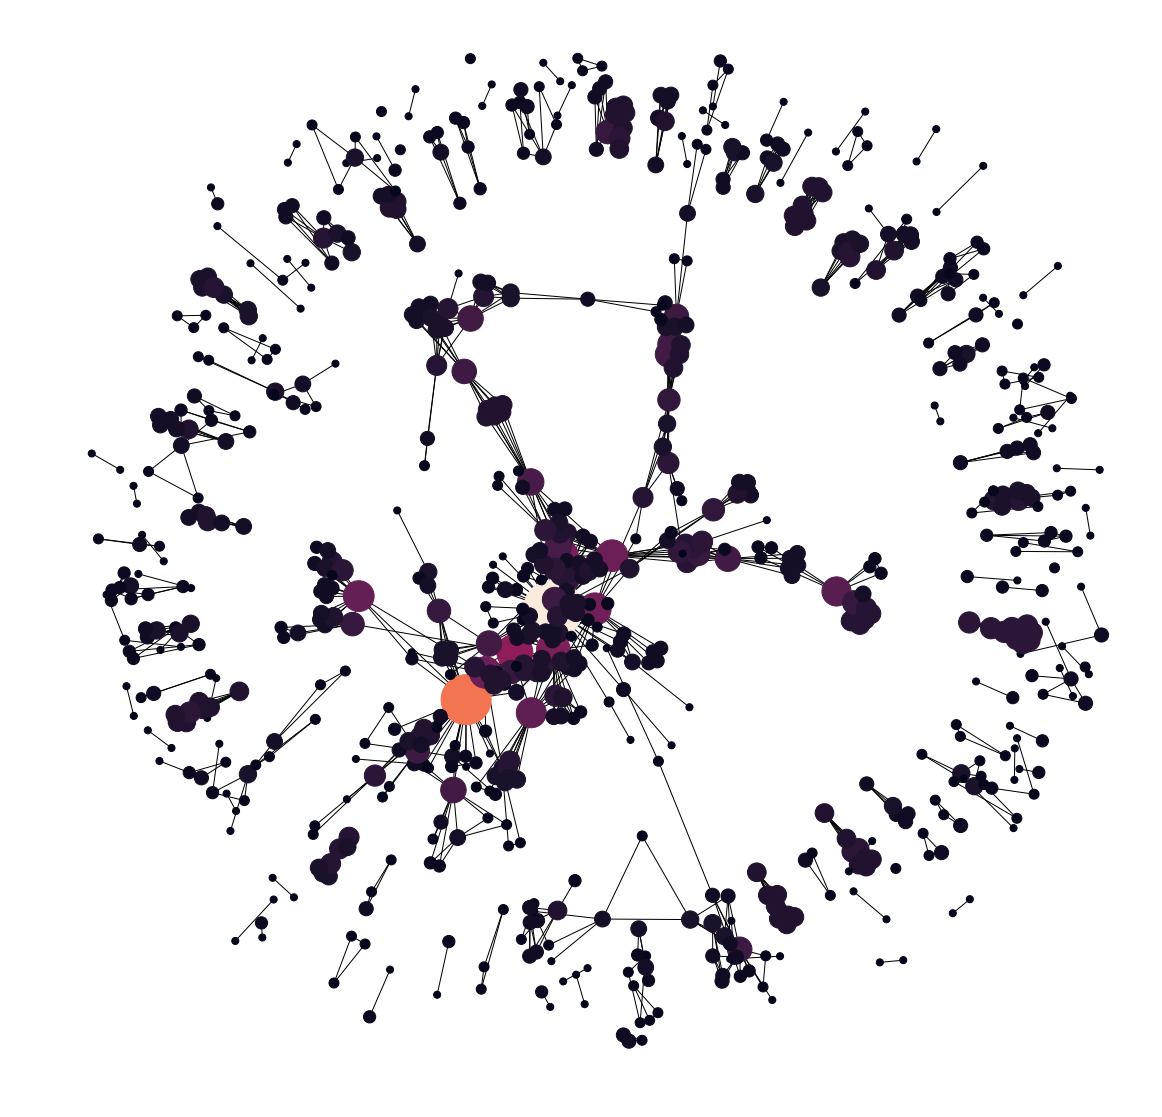

In [18]:
pos = nx.spring_layout(traffic_graph)
node_color = [20000.0 * traffic_graph.degree(v) for v in traffic_graph]
node_size =  [  50 * traffic_graph.degree(v) for v in traffic_graph]
plt.figure(figsize=(20,20))
nx.draw_networkx(traffic_graph, pos=pos, with_labels=False,
                 node_color=node_color,
                node_size=node_size)
plt.axis('off')

In [19]:
avg_cluster = nx.average_clustering(traffic_graph)
avg_cluster

0.7234062114342559

## Centrality Measures 

### Degree Centrality
 Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network

In [20]:
deg_c = nx.degree_centrality(traffic_graph)


In [21]:
d = pd.DataFrame()
d['Nodes'] = deg_c.keys()
d['Degree centrality'] = deg_c.values()

In [22]:
d.sort_values('Degree centrality',ascending= False).head(10)

,Nodes,Degree centrality
1,https://www.tudelft.nl,0.088945
31,https://www.tudelft.nl/en/,0.063532
33,https://www.tudelft.nl/en/education/programmes...,0.033037
14,https://www.tudelft.nl/2020/tu-delft/coronavirus/,0.029225
2,https://www.tudelft.nl/onderwijs/opleidingen/,0.027954
55,https://www.tudelft.nl/zoeken/,0.026684
3,https://www.tudelft.nl/onderwijs/opleidingen/b...,0.025413
32,https://www.tudelft.nl/en/education/programmes/,0.025413
99,https://www.tudelft.nl/en/education/programmes...,0.024142
184,https://www.tudelft.nl/studenten/,0.022872


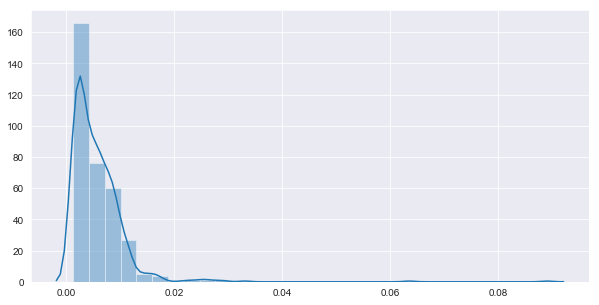

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(np.array(list(deg_c.values())), bins =30  )

### Eigenvector Centrality

It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. In Delhi Roads whenever the traffic police capture a person for breaking the traffic rule, the first sentence that traffic police hears is "Do you know whom I am related to?".

Eigenvector centrality is a measure of exactly this. It decides that a node is important if it is connected to other important nodes.

In [24]:
eigen_c= nx.eigenvector_centrality(traffic_graph)

In [25]:
eig = pd.DataFrame()
eig['Nodes'] = eigen_c.keys()
eig['Eigenvector centrality'] = eigen_c.values()

In [26]:
eig.sort_values('Eigenvector centrality',ascending= False).head(10)

,Nodes,Eigenvector centrality
1,https://www.tudelft.nl,0.519065
31,https://www.tudelft.nl/en/,0.247509
2,https://www.tudelft.nl/onderwijs/opleidingen/,0.219983
3,https://www.tudelft.nl/onderwijs/opleidingen/b...,0.187637
14,https://www.tudelft.nl/2020/tu-delft/coronavirus/,0.187370
5,https://www.tudelft.nl/onderwijs/opleidingen/m...,0.158297
55,https://www.tudelft.nl/zoeken/,0.156126
7,https://www.tudelft.nl/onderwijs/opleidingen/m...,0.134263
4,https://www.tudelft.nl/onderwijs/opleidingen/b...,0.132338
6,https://www.tudelft.nl/onderwijs/opleidingen/m...,0.122205


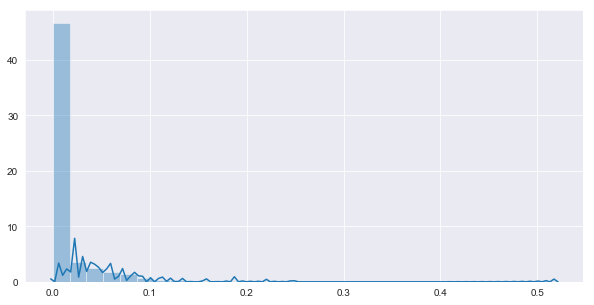

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(np.array(list(eigen_c.values())), bins =30 )

### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [30]:
between_c= nx.betweenness_centrality(traffic_graph, normalized=True, endpoints=False)

In [31]:
c = pd.DataFrame()
c['Nodes'] = between_c.keys()
c['Betweeness centrality'] = between_c.values()

In [34]:
c['Betweeness centrality'].value_counts().head(5)

0.000000    691
0.000818      8
0.000003      4
0.000019      3
0.000271      3
Name: Betweeness centrality, dtype: int64

691 out of the 788 have betweeness centrality 0

In [36]:
c.sort_values('Betweeness centrality',ascending= False).head(10)

,Nodes,Betweeness centrality
1,https://www.tudelft.nl,0.061880
31,https://www.tudelft.nl/en/,0.053234
55,https://www.tudelft.nl/zoeken/,0.022801
466,https://www.tudelft.nl/library/bezoek-gebruik/...,0.017178
3,https://www.tudelft.nl/onderwijs/opleidingen/b...,0.013160
99,https://www.tudelft.nl/en/education/programmes...,0.012559
14,https://www.tudelft.nl/2020/tu-delft/coronavirus/,0.011359
27,https://www.tudelft.nl/library/bezoek-gebruik/...,0.010483
7,https://www.tudelft.nl/onderwijs/opleidingen/m...,0.009389
184,https://www.tudelft.nl/studenten/,0.007339


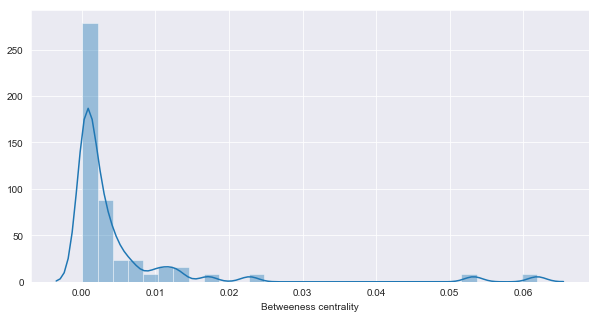

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(c[c['Betweeness centrality'] > 0.0001]['Betweeness centrality'], bins =30 )

C:\Users\konch\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


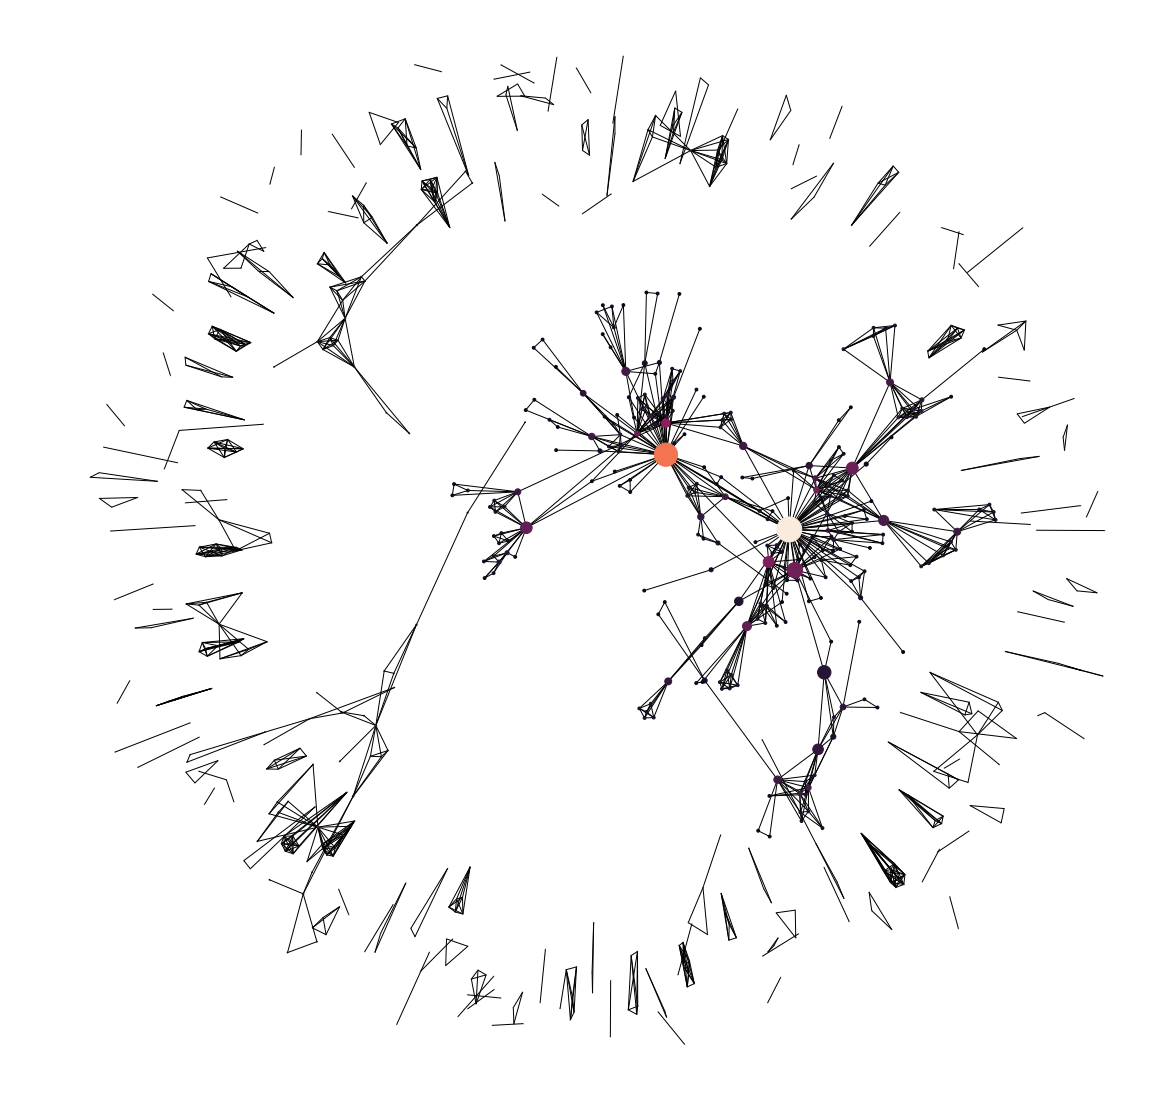

In [50]:
# call function from metric_help py
plot_graph(traffic_graph)

### PageRank


Page Rank Algorithm was developed by Google founders to measure the importance of webpages from the hyperlink network structure. Page Rank assigns a score of importance to each node. Important nodes are those with many inlinks from important pages. It mainly works for Directed Networks.

In [27]:
pr = nx.pagerank(traffic_graph, alpha=0.8)

In [29]:
pe = pd.DataFrame()
pe['Nodes'] = pr.keys()
pe['PageRank'] = pr.values()

In [42]:
pe['PageRank'].value_counts().head()

0.001269    191
0.001072     18
0.001140     10
0.001048     10
0.001663      9
Name: PageRank, dtype: int64

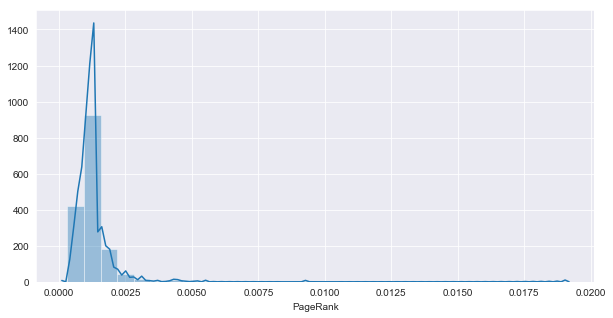

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(pe['PageRank'], bins =30 )

### Closeness Centrality 

This is based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes

In [26]:
close_centrality = nx.closeness_centrality(traffic_graph)

In [27]:
cl = pd.DataFrame()
cl['Nodes'] = close_centrality.keys()
cl['Closeness Centrality'] = close_centrality.values()

In [28]:
cl['Closeness Centrality'].value_counts().head(10)

0.001271    122
0.002541     97
0.005083     45
0.003812     34
0.006353     33
0.008895     32
0.007624     28
0.003388     13
0.011436     10
0.006777      8
Name: Closeness Centrality, dtype: int64

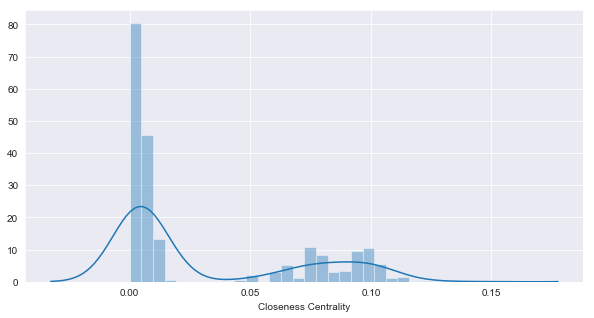

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(cl['Closeness Centrality'], bins =30 )

### Combining All in one


In [4]:
df3 = calculate_metrics_df(traffic_graph)

Name: 
Type: Graph
Number of nodes: 788
Number of edges: 1738
Average degree:   4.4112
The density of the graph is :0.005605041312185966
0.7234062114342559


In [5]:
df3.head()

,Nodes,Degree,Degree Centrality,Eigenvector Centrality,Betweeness Centrality,PageRank,Closeness Centrality
0,https://www.tudelft.nl/onderwijs/opleidingen/m...,7,0.008895,0.122205,0.00000,0.000897,0.104696
1,https://www.tudelft.nl,70,0.088945,0.519065,0.06188,0.018973,0.144836
2,https://www.tudelft.nl/onderwijs/opleidingen/,22,0.027954,0.219983,0.00242,0.005136,0.109449
3,https://www.tudelft.nl/onderwijs/opleidingen/b...,20,0.025413,0.187637,0.01316,0.002773,0.112297
4,https://www.tudelft.nl/onderwijs/opleidingen/b...,9,0.011436,0.132338,0.00000,0.001490,0.104696


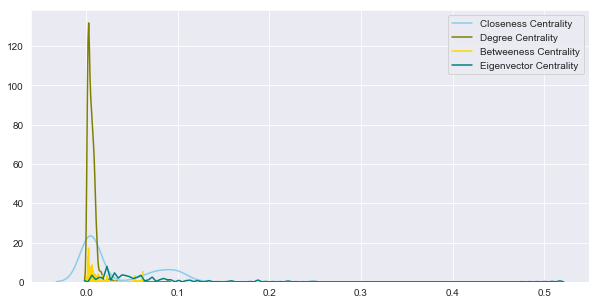

In [6]:
plot_distributions(df3)

C:\Users\konch\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


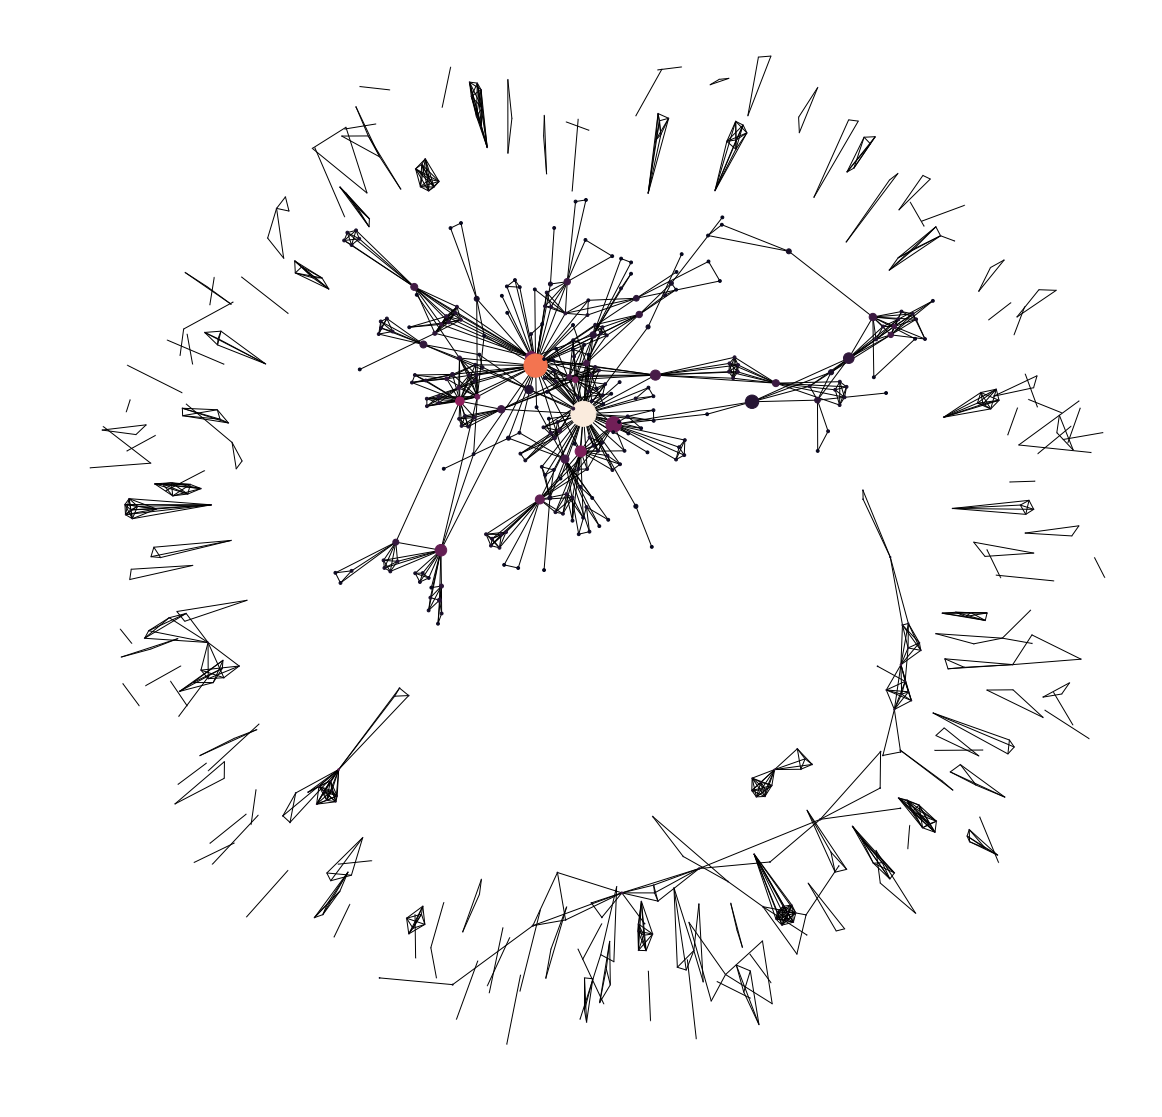

In [7]:
plot_graph(traffic_graph)

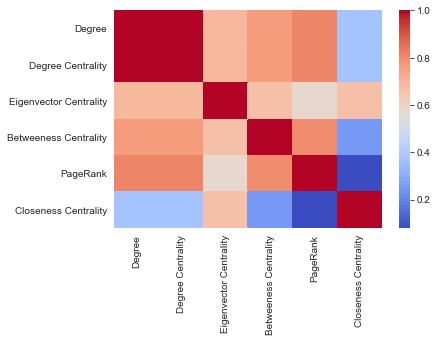

In [8]:
sns.heatmap(df3.corr(), cmap='coolwarm')